## UK House Price Index - Regression Modeling

### This script contains the following:
1. Importing libraries and data
2. Exploring the relationships between variables in dataset
3. 

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from datetime import datetime

In [3]:
path = r'/Users/andrew/Documents/Data Analyst Course/Data Immersion/Achievement 6/UK HPI Project/'

In [4]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'UK_HPI_CLEANED_1995.csv'))

In [5]:
df.head()

,Date,RegionName,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,Detached1m%Change,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Official Interest Rate
0,1/1/1995,Adur,54516.42545,21.836620,0.0,0.0,79.0,85482.01252,22.699081,0.0,...,22.378461,0.0,0.0,11.0,54372.37389,21.788639,0.0,0.0,68.0,6.13
1,1/1/1995,Allerdale,44464.03724,32.815689,0.0,0.0,70.0,67547.91981,34.139554,0.0,...,33.876423,0.0,0.0,9.0,43138.66035,32.908903,0.0,0.0,61.0,6.13
2,1/1/1995,Amber Valley,45424.80814,31.551992,0.0,0.0,114.0,66983.19796,32.574116,0.0,...,31.262341,0.0,0.0,16.0,44721.87801,31.570205,0.0,0.0,98.0,6.13
3,1/1/1995,Arun,59473.60257,25.259505,0.0,0.0,222.0,95785.74537,25.677194,0.0,...,24.467387,0.0,0.0,21.0,58827.71158,25.301688,0.0,0.0,201.0,6.13
4,1/1/1995,Ashfield,38911.87777,33.500470,0.0,0.0,97.0,56968.65464,35.040323,0.0,...,32.748969,0.0,0.0,23.0,38664.77907,34.044514,0.0,0.0,74.0,6.13


In [6]:
# Check shape of df
df.shape

(130902, 52)

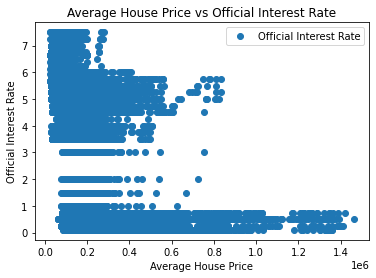

In [7]:
# Create a scatterplot using matplotlib to look at how AveragePrice and Official Interest Rate variables plot against each other

df.plot(x = 'AveragePrice', y='Official Interest Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average House Price vs Official Interest Rate')  
plt.xlabel('Average House Price')  
plt.ylabel('Official Interest Rate')  
plt.show()

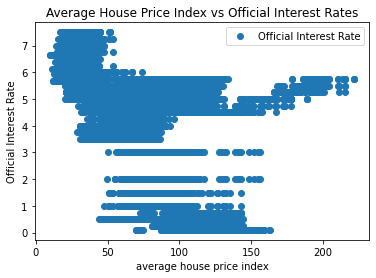

In [8]:
# Create a scatterplot using matplotlib to look at how Index and Official Interest Rate variables plot against each other.

df.plot(x = 'Index', y='Official Interest Rate',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Average House Price Index vs Official Interest Rates')  
plt.xlabel('average house price index')  
plt.ylabel('Official Interest Rate')  
plt.show()

/Users/andrew/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

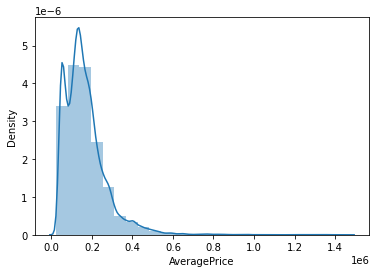

In [10]:
sns.distplot(df['AveragePrice'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [11]:
df['AveragePrice'].mean() # Check the mean

166940.73906664256

In [12]:
df['AveragePrice'].median() # Check the median

146726.3046

In [13]:
df['AveragePrice'].max() # Check the max

1463377.921

In [14]:
df['AveragePrice'].min() # Check the min

23100.73416

In [15]:
df.isnull().sum()

Date                      0
RegionName                0
AveragePrice              0
Index                     0
1m%Change                 0
12m%Change                0
SalesVolume               0
DetachedPrice             0
DetachedIndex             0
Detached1m%Change         0
Detached12m%Change        0
SemiDetachedPrice         0
SemiDetachedIndex         0
SemiDetached1m%Change     0
SemiDetached12m%Change    0
TerracedPrice             0
TerracedIndex             0
Terraced1m%Change         0
Terraced12m%Change        0
FlatPrice                 0
FlatIndex                 0
Flat1m%Change             0
Flat12m%Change            0
CashPrice                 0
CashIndex                 0
Cash1m%Change             0
Cash12m%Change            0
CashSalesVolume           0
MortgagePrice             0
MortgageIndex             0
Mortgage1m%Change         0
Mortgage12m%Change        0
MortgageSalesVolume       0
FTBPrice                  0
FTBIndex                  0
FTB1m%Change        

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['AveragePrice'].values.reshape(-1,1)
y = df['Official Interest Rate'].values.reshape(-1,1)

In [18]:
X

array([[ 54516.42545],
       [ 44464.03724],
       [ 45424.80814],
       ...,
       [218110.5708 ],
       [295785.9352 ],
       [194518.0643 ]])

In [19]:
y

array([[6.13],
       [6.13],
       [6.13],
       ...,
       [0.1 ],
       [0.1 ],
       [0.1 ]])

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

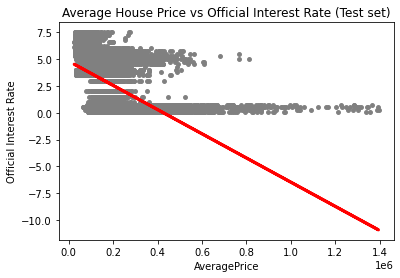

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Average House Price vs Official Interest Rate (Test set)')
plot_test.xlabel('AveragePrice')
plot_test.ylabel('Official Interest Rate')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.12719166e-05]]
Mean squared error:  4.843179209909571
R2 score:  0.23341581570171288


## Comments
MSE score is relatively small (4.8431) so regression could be used as a somewhat accurate measure however looking at the R2 score of 0.2334, that isn't a great fit either so may confirm that a different type of method is needed.

In [27]:
y_predicted

array([[ 3.2062443 ],
       [ 1.29049925],
       [ 2.54553798],
       ...,
       [-0.20637744],
       [ 4.11605189],
       [ 2.71375055]])

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.50,3.206244
1,0.50,1.290499
2,0.50,2.545538
3,6.00,3.858886
4,4.75,3.106368
5,0.25,2.829709
6,5.75,3.987849
7,0.50,2.799709
8,4.00,3.619063
9,0.50,3.551808


## Comparing how regression fits the training set

In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.12719166e-05]]
Mean squared error:  4.810542304078024
R2 score:  0.2379652023845764


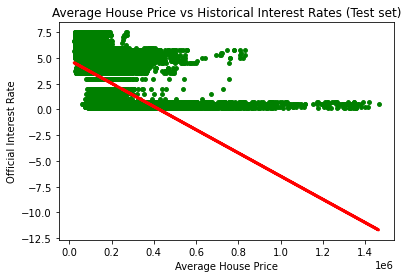

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Average House Price vs Historical Interest Rates (Test set)')
plot_test.xlabel('Average House Price')
plot_test.ylabel('Official Interest Rate')
plot_test.show()

## Comments
The mean squared erorr was relatively small at 4.8105 whilst the R2 score was 0.2379, when both measures are taken together it could be said that this model isn't a great fit. One of my working hypothesis was that in a low interest rate environment, house prices rise. While it does seem that this is partially true, these two measures suggest a weaker link that initially thought.